In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import Dense,MaxPool2D,Flatten,Conv2D
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

In [2]:
cifar=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train=x_train/255
x_test=x_test/255
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [5]:
model=Sequential([Conv2D(filters=32,kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
                   MaxPool2D(pool_size=2,strides=2, padding='valid'),
                   Flatten(),
                   Dense(100,activation="relu"),
                   Dense(10,activation="softmax")])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 100)               819300    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 821,206
Trainable params: 821,206
Non-trainable params: 0
__________________________________________________

In [6]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 48s 29ms/step - loss: 1.8636 - accuracy: 0.3385 - val_loss: 1.6568 - val_accuracy: 0.4198
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.5133 - accuracy: 0.4656 - val_loss: 1.4159 - val_accuracy: 0.4946
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.3471 - accuracy: 0.5247 - val_loss: 1.3621 - val_accuracy: 0.5068
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2541 - accuracy: 0.5582 - val_loss: 1.2687 - val_accuracy: 0.5441
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1903 - accuracy: 0.5812 - val_loss: 1.2641 - val_accuracy: 0.5533
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1360 - accuracy: 0.6028 - val_loss: 1.1920 - val_accuracy: 0.5753
Epoch 7/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0883 - accuracy: 0.6188 - val_loss: 1.1870 -

313/313 [==============================] - 4s 12ms/step


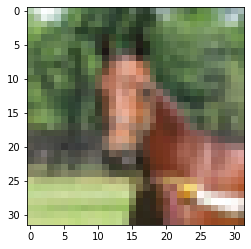

In [15]:
import random
n=random.randint(0,9999)
plt.imshow(x_test[n])
predict_val=model.predict(x_test)
index=np.argmax(predict_val[n])

In [16]:
if index==0:
    print('Airplane')
if index==1:
    print('automobile')
if index==2:
    print('bird')
if index==3:
    print('cat')
if index==4:
    print('deer')
if index==5:
    print('dog')
if index==6:
    print('frog')
if index==7:
    print('horse') 
if index==8:
    print('ship')
if index==9:
    print('truck')

horse
